This is a PySR run on the molecular mass dataset with the division operator removed and the logarithm and exponential operators added. Iterations increased to 1000. Time-out added to 2nd run.

In [1]:
# Install libraries
%pip install -U pysr

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Call Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from google.colab import drive
from pysr import PySRRegressor
import time
#import math
import sympy as sym

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [3]:
# Colab
#drive.mount('/content/drive')
#df=pd.read_csv('/content/drive/MyDrive/goossens_raw.csv')
# Positron
df=pd.read_csv('./goossens_raw.csv')
# Quarto
#df=pd.read_csv('./c694/goossens_raw.csv')

y=df['MW']
x=df[['SG','TBP']]

In [4]:
t0 = time.time()
# Add Log and Exp Functions
myMod=PySRRegressor(
    random_state=7,
    deterministic=True,
    parallelism='serial',
    binary_operators=["+","-","*"],
    unary_operators=["exp","log"],
    niterations=1000)
myMod.fit(x,y)
y_pred=myMod.predict(x)
print("time to fit: ",time.time() - t0, 'seconds')

/home/richard/Documents/p312a/lib/python3.12/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
Compiling Julia backend...
[ Info: Started!



Expressions evaluated per second: 2.480e+05
Progress: 970 / 31000 total iterations (3.129%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           9.627e+04  0.000e+00  y = 304.55
3           2.941e+04  5.897e-01  y = TBP + -270.61
5           1.858e+04  2.281e-01  y = (TBP * 0.00093598) * TBP
6           1.658e+04  1.115e-01  y = TBP * (log(TBP) + -5.8922)
7           1.090e+04  4.186e-01  y = ((TBP * 0.0016541) + -0.54181) * TBP
9           6.138e+03  2.865e-01  y = (TBP * ((TBP * 0.0032561) + -2.6518)) + 631.67
11          4.551e+03  1.493e-01  y = ((TBP * TBP) * 1.7955e-06) * ((SG * -310.59) + TBP)
13          2.102e+03  3.859e-01  y = ((TBP * 2.235e-06) * ((TBP + (SG * -502.32)) * TBP)) +...
                                       98.301
15          1.766e+03  8.715e-02  y = (((TBP -

[ Info: Final population:
[ Info: Results saved to:



Expressions evaluated per second: 2.900e+05
Progress: 28287 / 31000 total iterations (91.248%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           9.627e+04  0.000e+00  y = 304.55
3           2.941e+04  5.897e-01  y = TBP + -270.62
4           1.888e+04  4.402e-01  y = exp(TBP * 0.0073314)
5           1.858e+04  1.396e-02  y = (TBP * TBP) * 0.00093598
6           3.878e+03  1.566e+00  y = exp((TBP * 0.0044146) + 2.7695)
8           3.102e+03  1.115e-01  y = (TBP * 0.2609) + exp(TBP * 0.0070527)
9           8.078e+02  1.345e+00  y = exp(((TBP * 0.0044146) - log(SG)) + 2.6899)
11          7.737e+02  2.151e-02  y = exp(((TBP * 0.0044146) + 2.6908) - log(SG)) - 5.8004
12          6.140e+02  2.312e-01  y = (TBP * exp(((TBP * 0.0040278) + -2.8286) - SG)) + 57.5...
                          

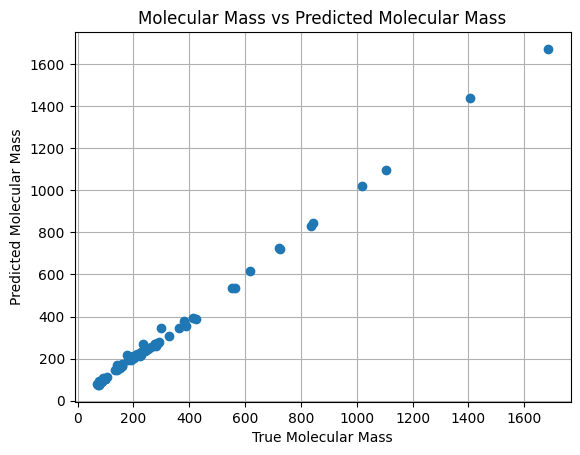

In [5]:
plt.plot(y,y_pred,marker="o",linestyle="None")
plt.xlabel('True Molecular Mass')
plt.ylabel('Predicted Molecular Mass')
plt.title('Molecular Mass vs Predicted Molecular Mass')
plt.grid()
plt.show()

In [6]:
# Pull Out Equation
myEq=myMod.sympy()
# Clean-Up Equation
sym.simplify(myEq)

(0.449491965290983*TBP - 62.7032301741615)*exp(3.4424363e-9*TBP**2*(-355.2896*SG + 0.7036*TBP))

In [7]:
print(myMod)

PySRRegressor.equations_ = [
	    pick     score                                           equation         loss  complexity
	0         0.000000                                          304.55478  96270.34000           1
	1         0.592876                                   TBP + -270.62112  29412.14500           3
	2         0.443273                            exp(TBP * 0.0073313797)  18880.59000           4
	3         0.015941                          (TBP * TBP) * 0.000935977  18582.01000           5
	4         1.566772                 exp((TBP * 0.00441459) + 2.769467)   3878.39650           6
	5         0.873224       exp(((0.0046037138 * TBP) + 3.5405977) - SG)    676.36290           8
	6         0.014197  exp(((0.004582665 * TBP) - SG) + 3.543425) - -...    657.42800          10
	7         0.034199  (TBP * exp(((TBP * 0.004027789) + -2.8285704) ...    613.96440          12
	8         0.016968  (TBP * exp((-2.8285704 - (SG * 1.0217484)) + (...    593.47860          14
	9         

In [8]:
# Load Hosseinifar dataset
# Colab
#drive.mount('/content/drive')
#df=pd.read_csv('/content/drive/MyDrive/hosseinifar_raw.csv')
# Positron
dfh=pd.read_csv('./hosseinifar_raw.csv')
# Quarto
#df=pd.read_csv('./c694/hosseinifar_raw.csv')

yh=dfh['MW']
xh=dfh[['SG','TBP']]

In [9]:
t0 = time.time()
# Re-Run with new random seed
urMod=PySRRegressor(
    random_state=11,
    deterministic=True,
    parallelism='serial',
    binary_operators=["+","-","*"],
    unary_operators=["exp","log"],
    timeout_in_seconds=1000)
#    niterations=1000,
urMod.fit(x,y)
z_pred=urMod.predict(x)
print("time to fit: ",time.time() - t0, 'seconds')

/home/richard/Documents/p312a/lib/python3.12/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:



Expressions evaluated per second: 2.690e+05
Progress: 1150 / 3100 total iterations (37.097%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           9.627e+04  0.000e+00  y = 304.55
3           2.941e+04  5.897e-01  y = TBP - 270.62
5           2.347e+04  1.116e-01  y = (TBP * 1.3999) - 500.62
6           1.658e+04  3.446e-01  y = TBP * (log(TBP) + -5.8922)
7           7.214e+03  8.313e-01  y = ((1.1829e-06 * TBP) * TBP) * TBP
9           6.138e+03  8.050e-02  y = (TBP * ((TBP * 0.0032561) + -2.6519)) - -631.68
11          4.928e+03  1.095e-01  y = ((TBP + -502.26) * ((TBP * TBP) * 2.2773e-06)) + 138.0...
                                      3
13          2.105e+03  4.250e-01  y = (((TBP * 2.2244e-06) * TBP) * (TBP + (SG * -497.23))) ...
                                      + 94.722
15 

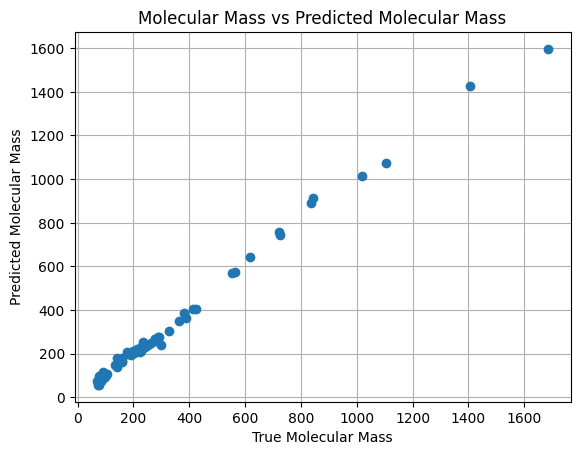

In [10]:
# Replot with new predictions
plt.plot(y,z_pred,marker="o",linestyle="None")
plt.xlabel('True Molecular Mass')
plt.ylabel('Predicted Molecular Mass')
plt.title('Molecular Mass vs Predicted Molecular Mass')
plt.grid()
plt.show()

In [11]:
# Pull Out New Equation
urEq=urMod.sympy()
# Clean-Up Equation
sym.simplify(urEq)

TBP*(4.9023887e-9*TBP*(-677.21405*SG + TBP)*(TBP - 513.6299) + 0.64059657) - 150.31517

In [12]:
# Add New Predictions to training Dataframe
df['Fit_Mw_7']=y_pred
df['Fit_Mw_11']=z_pred
# Calculate Correlation Coefficient between columns
df.corr()

,SG,TBP,MW,Fit_Mw_7,Fit_Mw_11
SG,1.000000,0.625218,0.334852,0.353473,0.341011
TBP,0.625218,1.000000,0.869591,0.864733,0.872484
MW,0.334852,0.869591,1.000000,0.998880,0.997518
Fit_Mw_7,0.353473,0.864733,0.998880,1.000000,0.997468
Fit_Mw_11,0.341011,0.872484,0.997518,0.997468,1.000000


In [13]:
# Print (Old) Equation before clean-up
print(myEq)

(TBP - 139.498)*exp((SG*(-355.2896) + TBP*0.7036)*TBP*TBP*3.4424363e-9 - 0.7996373)


In [14]:
# Generate testing Predictions
y_h1=myMod.predict(xh)
y_h2=urMod.predict(xh)

In [15]:
# Add Predictions to testing Dataframe
dfh['Fit_Mw_7']=y_h1
dfh['Fit_Mw_11']=y_h2
# Calculate Correlation Coefficient between columns
dfh.corr()

,SG,TBP,MW,Fit_Mw_7,Fit_Mw_11
SG,1.000000,0.985561,0.954145,0.953694,0.954164
TBP,0.985561,1.000000,0.990235,0.989896,0.989704
MW,0.954145,0.990235,1.000000,0.999973,0.999790
Fit_Mw_7,0.953694,0.989896,0.999973,1.000000,0.999905
Fit_Mw_11,0.954164,0.989704,0.999790,0.999905,1.000000
